---
title: "6. Additional-Time Series Analysis"
format: 
  html:
    toc: false
    page-layout: full
    code-fold: true
execute:
    echo: false
    warning: false
---

For the three dependent varaibles real GDP per capita (REALGDPpercapita), median household income (MedHHInc), and percentage of bachelor's degree graduate (PctBach), I plotted a time-series to analyse the general trend. I did not do for life expectancy as I do not have data for 2022 and 2023.

Each line is further colour coded by each US states to identify whether there are disparities over time.

In [346]:
#| echo: false
#| code-fold: true
#| include: false

!pip install cenpy
import cenpy
import numpy as np
np.random.seed(42)

In [347]:
#| echo: false
#| code-fold: true
#| include: false

# Finding data set
available = cenpy.explorer.available()
available

# We use data from ACS 5 Year, Monthly Export and Import

c_isTimeseries c_isMicrodata           publisher   temporal  \
ABSCB2017                  NaN           NaN  U.S. Census Bureau  2017/2017   
ABSCB2018                  NaN           NaN  U.S. Census Bureau  2018/2018   
ABSCB2019                  NaN           NaN  U.S. Census Bureau  2019/2019   
ABSCB2020                  NaN           NaN  U.S. Census Bureau  2020/2020   
ABSCB2021                  NaN           NaN  U.S. Census Bureau  2021/2021   
...                        ...           ...                 ...        ...   
ftd16ImpExpHist            NaN           NaN  U.S. Census Bureau  2016/2016   
ftd17ImpExpHist            NaN           NaN  U.S. Census Bureau  2017/2017   
ftd18ImpExpHist            NaN           NaN  U.S. Census Bureau  2018/2018   
ftdImpExpHist              NaN           NaN  U.S. Census Bureau  2014/2014   
pubschlfin2012             NaN           NaN  U.S. Census Bureau  2012/2012   

                       spatial programCode               modified    keyword  \
ABSCB2017        United States     006:007  2020-04-30 00:00:00.0  (census,)   
ABSCB2018        United States     006:007  2020-10-26 00:00:00.0  (census,)   
ABSCB2019                   US     006:007  2021-08-17 00:00:00.0  (census,)   
ABSCB2020                   US     006:007  2022-08-03 00:00:00.0  (census,)   
ABSCB2021        United States     006:007  2023-07-24 10:30:52.0  (census,)   
...                        ...         ...                    ...        ...   
ftd16ImpExpHist  United States     000:000             2017-07-13  (census,)   
ftd17ImpExpHist  United States     000:000             2018-03-13  (census,)   
ftd18ImpExpHist  United States     000:000             2019-03-13  (census,)   
ftdImpExpHist    United States     000:000             2015-07-20  (census,)   
pubschlfin2012   United States     006:000             2014-09-30  (census,)   

                                                      contactPoint  \
ABSCB2017        {'fn': 'ABS Staff', 'hasEmail': 'mailto:adep.a...   
ABSCB2018        {'fn': 'ABS Staff', 'hasEmail': 'mailto:adep.a...   
ABSCB2019        {'fn': 'ASE Staff', 'hasEmail': 'mailto:ERD.an...   
ABSCB2020        {'fn': 'ASE Staff', 'hasEmail': 'mailto:ERD.an...   
ABSCB2021        {'fn': 'ABS Staff', 'hasEmail': 'mailto:adep.a...   
...                                                            ...   
ftd16ImpExpHist  {'fn': 'Foreign Trade Staff', 'hasEmail': 'mai...   
ftd17ImpExpHist  {'fn': 'Foreign Trade Staff', 'hasEmail': 'mai...   
ftd18ImpExpHist  {'fn': 'Foreign Trade Staff', 'hasEmail': 'mai...   
ftdImpExpHist    {'fn': 'Foreign Trade Staff', 'hasEmail': 'mai...   
pubschlfin2012   {'fn': 'Public Elementary-Secondary Education ...   

                                                      distribution  \
ABSCB2017        {'@type': 'dcat:Distribution', 'accessURL': 'h...   
ABSCB2018        {'@type': 'dcat:Distribution', 'accessURL': 'h...   
ABSCB2019        {'@type': 'dcat:Distribution', 'accessURL': 'h...   
ABSCB2020        {'@type': 'dcat:Distribution', 'accessURL': 'h...   
ABSCB2021        {'@type': 'dcat:Distribution', 'accessURL': 'h...   
...                                                            ...   
ftd16ImpExpHist  {'@type': 'dcat:Distribution', 'accessURL': 'h...   
ftd17ImpExpHist  {'@type': 'dcat:Distribution', 'accessURL': 'h...   
ftd18ImpExpHist  {'@type': 'dcat:Distribution', 'accessURL': 'h...   
ftdImpExpHist    {'@type': 'dcat:Distribution', 'accessURL': 'h...   
pubschlfin2012   {'@type': 'dcat:Distribution', 'accessURL': 'h...   

                                                       description bureauCode  \
ABSCB2017        The Annual Business Survey (ABS) provides info...     006:07   
ABSCB2018        The Annual Business Survey (ABS) provides info...     006:07   
ABSCB2019        The Annual Business Survey (ABS) provides info...     006:07   
ABSCB2020        The Annual Business Survey (ABS) provides info...     006:07   
ABSCB2021        Th

In [348]:
#| echo: false
#| code-fold: true
#| include: false
acs = available.filter(regex="^ACS", axis=0)
available.filter(regex="^ACSDT5Y", axis=0)

c_isTimeseries c_isMicrodata           publisher   temporal  \
ACSDT5Y2009                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2010                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2011                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2012                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2013                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2014                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2015                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2016                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2017                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2018                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2019                NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5Y2020                NaN           NaN  U.S. Census Bureau  2020/2020   
ACSDT5Y2021                NaN           NaN  U.S. Census Bureau  2021/2021   
ACSDT5Y2022                NaN           NaN  U.S. Census Bureau  2022/2022   
ACSDT5Y2023                NaN           NaN  U.S. Census Bureau  2023/2023   
ACSDT5YAIAN2010            NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5YAIAN2015            NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5YAIAN2021            NaN           NaN  U.S. Census Bureau  2021/2021   
ACSDT5YSPT2010             NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5YSPT2015             NaN           NaN  U.S. Census Bureau        NaN   
ACSDT5YSPT2021             NaN           NaN  U.S. Census Bureau  2021/2021   

                       spatial programCode               modified    keyword  \
ACSDT5Y2009                NaN     006:004  2019-08-27 13:11:18.0  (census,)   
ACSDT5Y2010      United States     006:004  2018-07-04 00:00:00.0  (census,)   
ACSDT5Y2011                NaN     006:004  2018-07-04 00:00:00.0  (census,)   
ACSDT5Y2012                NaN     006:004  2018-07-04 00:00:00.0  (census,)   
ACSDT5Y2013                NaN     006:004  2018-07-04 00:00:00.0  (census,)   
ACSDT5Y2014                NaN     006:004  2018-07-04 00:00:00.0  (census,)   
ACSDT5Y2015                NaN     006:004  2018-07-05 00:00:00.0  (census,)   
ACSDT5Y2016                NaN     006:004  2018-07-05 00:00:00.0  (census,)   
ACSDT5Y2017                NaN     006:004  2018-08-21 07:11:43.0  (census,)   
ACSDT5Y2018                NaN     006:004  2019-10-22 16:28:02.0  (census,)   
ACSDT5Y2019                NaN     006:004  2020-04-03 00:00:00.0  (census,)   
ACSDT5Y2020                 US     006:004  2021-07-13 00:00:00.0  (census,)   
ACSDT5Y2021                 US     006:004  2022-08-08 00:00:00.0  (census,)   
ACSDT5Y2022                 US     006:004  2023-09-05 12:01:39.0  (census,)   
ACSDT5Y2023                 US     006:004  2024-09-06 17:27:47.0  (census,)   
ACSDT5YAIAN2010            NaN     006:004  2019-10-24 07:18:57.0  (census,)   
ACSDT5YAIAN2015            NaN     006:004  2020-02-13 00:00:00.0  (census,)   
ACSDT5YAIAN2021             US     006:004  2022-11-29 00:00:00.0  (census,)   
ACSDT5YSPT2010             NaN     006:004  2019-10-11 14:16:00.0  (census,)   
ACSDT5YSPT2015             NaN     006:004  2020-02-18 00:00:00.0  (census,)   
ACSDT5YSPT2021              US     006:004  2022-11-29 00:00:00.0  (census,)   

                                                      contactPoint  \
ACSDT5Y2009      {'fn': 'American Community Survey Office', 'ha...   
ACSDT5Y2010      {'fn': 'American Community Survey Office', 'ha...   
ACSDT5Y2011      {'fn': 'American Community Survey Office', 'ha...   
ACSDT5Y2012      {'fn': 'American Community Survey Office', 'ha...   
ACSDT5Y2013      {'fn': 'American Community Survey Office', 'ha...   
ACSDT5Y2014      {'fn': 'American Community Survey Office', 'ha...   
ACSDT5Y2015      {'fn': 'A

In [349]:
#| echo: false
#| code-fold: true
#| include: false
acs_variables = [
    "NAME",
    "GEO_ID",
    "B19019_001E", # Total Median Household Income
    "B06009_001E", # Educational Attainment- Total
    "B06009_002E", # Educational Attainment- Less than high school graduate
    "B06009_003E", # Educational Attainment- High school graduate (equivalent)
    "B06009_004E", # Educational Attainment- Some college or associate's degree
    "B06009_005E", # Educational Attainment- Bachelor's degree or higher
    "B01003_001E", # Total Population
    "B23025_001E", # Total Population above 16
    "B23025_002E", # Labor Force- Total
    "B23025_005E", # Labour Force- Unemployed
    "B17020_001E", # Population for whom poverty is determined
    "B17020_002E", # Population below poverty level
]


In [350]:
#| echo: false
#| code-fold: true
#| include: false

# ACS 2023

cenpy.explorer.explain("ACSDT5Y2023")
acs = cenpy.remote.APIConnection('ACSDT5Y2023')

USA_acs_data_2023 = acs.query(
    cols=acs_variables,
    geo_unit="state:*",
)

USA_acs_data_2023.head()

NAME       GEO_ID B19019_001E B06009_001E B06009_002E B06009_003E  \
0     Alabama  0400000US01       62027     3448302      409381     1046374   
1      Alaska  0400000US02       89336      487903       31854      141206   
2     Arizona  0400000US04       76872     4990633      544528     1171693   
3    Arkansas  0400000US05       58773     2043779      233857      702778   
4  California  0400000US06       96334    26941198     4149146     5496195   

  B06009_004E B06009_005E B01003_001E B23025_001E B23025_002E B23025_005E  \
0     1035466      584986     5054253     4056609     2358667      112849   
1      162411       95793      733971      574021      380935       20644   
2     1646950      999535     7268175     5862117     3547314      182184   
3      593923      324625     3032651     2409758     1405609       71269   
4     7461496     6035609    39242785    31545603    20144078     1282259   

  B17020_001E B17020_002E state  
0     4913932      768185    01  
1      716703       72978    02  
2     7109159      907125    04  
3     2944742      471783    05  
4    38529452     4610600    06

In [351]:
#| echo: false
#| code-fold: true
#| include: false
for variable in acs_variables:
    # Convert all variables EXCEPT for NAME
    if variable not in ("NAME", "GEO_ID"):
        USA_acs_data_2023[variable] = USA_acs_data_2023[variable].astype(float)

In [352]:
#| echo: false
#| code-fold: true
#| include: false
USA_acs_data_2023 = USA_acs_data_2023.rename(
    columns={
        "B19019_001E": "MedHHInc", # Total Median Household Income
        "B06009_001E": "EducTotal", # Educational Attainment- Total
        "B06009_002E": "EducBelowHighSch", # Educational Attainment- Less than high school graduate
        "B06009_003E": "EducHighSch", # Educational Attainment- High school graduate (equivalent)
        "B06009_004E": "EducAssoc", # Educational Attainment- Some college or associate's degree
        "B06009_005E": "EducBach", # Educational Attainment- Bachelor's degree or higher
        "B01003_001E": "TotalPop", # Total Population
        "B23025_001E": "TotalPop16", # Total Population above 16
        "B23025_002E": "LabForTotal", # Labor Force- Total
        "B23025_005E": "Unemployed", # Labour Force- Unemployed
        "B17020_001E": "PopPovertyDetermined", # Population for whom poverty is determined
        "B17020_002E": "PovertyPop", # Population below poverty level
    }
)

In [353]:
#| echo: false
#| code-fold: true
#| include: false
USA_acs_data_2023['PctBach'] = USA_acs_data_2023['EducBach']/USA_acs_data_2023['EducTotal']
USA_acs_data_2023['PovertyRate'] = USA_acs_data_2023['PovertyPop']/USA_acs_data_2023['PopPovertyDetermined']
USA_acs_data_2023['UnemploymentRate'] = USA_acs_data_2023['Unemployed']/USA_acs_data_2023['LabForTotal']
USA_acs_data_2023['LabForParticipationRate'] = USA_acs_data_2023['LabForTotal']/USA_acs_data_2023['TotalPop16']

#Remove Puerto Rico
USA_acs_data_2023 = USA_acs_data_2023[USA_acs_data_2023['NAME'] != 'Puerto Rico']

#Add Year
USA_acs_data_2023['YEAR'] = '2023'

In [354]:
#| echo: false
#| code-fold: true
#| include: false
# ACS 2022
cenpy.explorer.explain("ACSDT5Y2022")
acs = cenpy.remote.APIConnection('ACSDT5Y2022')

USA_acs_data_2022 = acs.query(
    cols=acs_variables,
    geo_unit="state:*",
)

USA_acs_data_2022.head()

NAME       GEO_ID B19019_001E B06009_001E B06009_002E B06009_003E  \
0     Alabama  0400000US01       59609     3428520      421180     1041725   
1      Alaska  0400000US02       86370      485871       31689      140126   
2     Arizona  0400000US04       72581     4878959      551432     1151380   
3    Arkansas  0400000US05       56335     2031847      239655      693875   
4  California  0400000US06       91905    26842698     4185710     5485499   

  B06009_004E B06009_005E B01003_001E B23025_001E B23025_002E B23025_005E  \
0     1032770      572252     5028092     4046614     2345086      120030   
1      164659       93744      734821      573998      383078       23035   
2     1624693      958447     7172282     5764417     3490030      186058   
3      596338      317437     3018669     2402462     1397075       71601   
4     7544516     5935292    39356104    31601862    20168662     1282055   

  B17020_001E B17020_002E state  
0     4890427      768897    01  
1      717293       75227    02  
2     7017776      916876    04  
3     2931377      475729    05  
4    38643585     4685272    06

In [355]:
#| echo: false
#| code-fold: true
#| include: false
for variable in acs_variables:
    # Convert all variables EXCEPT for NAME
    if variable not in ("NAME", "GEO_ID"):
        USA_acs_data_2022[variable] = USA_acs_data_2022[variable].astype(float)

In [356]:
#| echo: false
#| code-fold: true
#| include: false
USA_acs_data_2022 = USA_acs_data_2022.rename(
    columns={
        "B19019_001E": "MedHHInc", # Total Median Household Income
        "B06009_001E": "EducTotal", # Educational Attainment- Total
        "B06009_002E": "EducBelowHighSch", # Educational Attainment- Less than high school graduate
        "B06009_003E": "EducHighSch", # Educational Attainment- High school graduate (equivalent)
        "B06009_004E": "EducAssoc", # Educational Attainment- Some college or associate's degree
        "B06009_005E": "EducBach", # Educational Attainment- Bachelor's degree or higher
        "B01003_001E": "TotalPop", # Total Population
        "B23025_001E": "TotalPop16", # Total Population above 16
        "B23025_002E": "LabForTotal", # Labor Force- Total
        "B23025_005E": "Unemployed", # Labour Force- Unemployed
        "B17020_001E": "PopPovertyDetermined", # Population for whom poverty is determined
        "B17020_002E": "PovertyPop", # Population below poverty level
    }
)

In [357]:
#| echo: false
#| code-fold: true
#| include: false
USA_acs_data_2022['PctBach'] = USA_acs_data_2022['EducBach']/USA_acs_data_2022['EducTotal']
USA_acs_data_2022['PovertyRate'] = USA_acs_data_2022['PovertyPop']/USA_acs_data_2022['PopPovertyDetermined']
USA_acs_data_2022['UnemploymentRate'] = USA_acs_data_2022['Unemployed']/USA_acs_data_2022['LabForTotal']
USA_acs_data_2022['LabForParticipationRate'] = USA_acs_data_2022['LabForTotal']/USA_acs_data_2022['TotalPop16']

#Remove Puerto Rico
USA_acs_data_2022 = USA_acs_data_2022[USA_acs_data_2022['NAME'] != 'Puerto Rico']

#Add Year
USA_acs_data_2022['YEAR'] = '2022'

In [358]:
#| echo: false
#| code-fold: true
#| include: false

# ACS 2021
cenpy.explorer.explain("ACSDT5Y2021")
acs = cenpy.remote.APIConnection('ACSDT5Y2021')

USA_acs_data_2021 = acs.query(
    cols=acs_variables,
    geo_unit="state:*",
)

USA_acs_data_2021.head()

NAME       GEO_ID B19019_001E B06009_001E B06009_002E B06009_003E  \
0     Alabama  0400000US01       54943     3413803      430047     1041209   
1      Alaska  0400000US02       80287      484382       32669      137873   
2     Arizona  0400000US04       65913     4792007      560460     1125498   
3    Arkansas  0400000US05       52123     2021290      248721      688732   
4  California  0400000US06       84097    26797070     4236035     5477154   

  B06009_004E B06009_005E B01003_001E B23025_001E B23025_002E B23025_005E  \
0     1032122      563628     4997675     4005499     2313616      124416   
1      165649       92691      735951      572165      383795       25054   
2     1610633      923339     7079203     5650624     3424193      191115   
3      592568      313527     3006309     2382255     1390373       73733   
4     7632443     5855383    39455353    31499704    20129162     1303741   

  B17020_001E B17020_002E state  
0     4876863      769819    01  
1      719086       75016    02  
2     6926281      934911    04  
3     2923735      468113    05  
4    38701352     4741175    06

In [359]:
#| echo: false
#| code-fold: true
#| include: false
for variable in acs_variables:
    # Convert all variables EXCEPT for NAME
    if variable not in ("NAME", "GEO_ID"):
        USA_acs_data_2021[variable] = USA_acs_data_2021[variable].astype(float)

In [360]:
#| echo: false
#| code-fold: true
#| include: false
USA_acs_data_2021 = USA_acs_data_2021.rename(
    columns={
        "B19019_001E": "MedHHInc", # Total Median Household Income
        "B06009_001E": "EducTotal", # Educational Attainment- Total
        "B06009_002E": "EducBelowHighSch", # Educational Attainment- Less than high school graduate
        "B06009_003E": "EducHighSch", # Educational Attainment- High school graduate (equivalent)
        "B06009_004E": "EducAssoc", # Educational Attainment- Some college or associate's degree
        "B06009_005E": "EducBach", # Educational Attainment- Bachelor's degree or higher
        "B01003_001E": "TotalPop", # Total Population
        "B23025_001E": "TotalPop16", # Total Population above 16
        "B23025_002E": "LabForTotal", # Labor Force- Total
        "B23025_005E": "Unemployed", # Labour Force- Unemployed
        "B17020_001E": "PopPovertyDetermined", # Population for whom poverty is determined
        "B17020_002E": "PovertyPop", # Population below poverty level
    }
)

In [361]:
#| echo: false
#| code-fold: true
#| include: false
USA_acs_data_2021['PctBach'] = USA_acs_data_2021['EducBach']/USA_acs_data_2021['EducTotal']
USA_acs_data_2021['PovertyRate'] = USA_acs_data_2021['PovertyPop']/USA_acs_data_2021['PopPovertyDetermined']
USA_acs_data_2021['UnemploymentRate'] = USA_acs_data_2021['Unemployed']/USA_acs_data_2021['LabForTotal']
USA_acs_data_2021['LabForParticipationRate'] = USA_acs_data_2021['LabForTotal']/USA_acs_data_2021['TotalPop16']

#Remove Puerto Rico
USA_acs_data_2021 = USA_acs_data_2021[USA_acs_data_2021['NAME'] != 'Puerto Rico']

#Add Year
USA_acs_data_2021['YEAR'] = '2021'

In [362]:
#| echo: false
#| code-fold: true
#| include: false

## ACS 2020
cenpy.explorer.explain("ACSDT5Y2020")
acs = cenpy.remote.APIConnection('ACSDT5Y2020')

USA_acs_data_2020 = acs.query(
    cols=acs_variables,
    geo_unit="state:*",
)

USA_acs_data_2020.head()

NAME       GEO_ID B19019_001E B06009_001E B06009_002E B06009_003E  \
0   Pennsylvania  0400000US42       63627     8989998      809967     3072381   
1     California  0400000US06       78672    26665143     4286538     5431385   
2  West Virginia  0400000US54       48037     1283869      159031      513143   
3           Utah  0400000US49       74197     1868472      131710      425180   
4       New York  0400000US36       71117    13649157     1743890     3474389   

  B06009_004E B06009_005E B01003_001E B23025_001E B23025_002E B23025_005E  \
0     2201133     1754311    12794885    10456049     6566126      351248   
1     7690347     5764827    39346023    31403964    20016955     1229079   
2      338270      163598     1807426     1485332      798208       52031   
3      663512      429936     3151239     2325169     1600462       57829   
4     3318086     2854930    19514849    15908940    10032721      570570   

  B17020_001E B17020_002E state  
0    12387061     1480430    42  
1    38589882     4853434    06  
2     1755591      300152    54  
3     3102049      283360    49  
4    19009098     2581048    36

In [363]:
#| echo: false
#| code-fold: true
#| include: false
for variable in acs_variables:
    # Convert all variables EXCEPT for NAME
    if variable not in ("NAME", "GEO_ID"):
        USA_acs_data_2020[variable] = USA_acs_data_2020[variable].astype(float)

In [364]:
#| echo: false
#| code-fold: true
#| include: false
USA_acs_data_2020 = USA_acs_data_2020.rename(
    columns={
        "B19019_001E": "MedHHInc", # Total Median Household Income
        "B06009_001E": "EducTotal", # Educational Attainment- Total
        "B06009_002E": "EducBelowHighSch", # Educational Attainment- Less than high school graduate
        "B06009_003E": "EducHighSch", # Educational Attainment- High school graduate (equivalent)
        "B06009_004E": "EducAssoc", # Educational Attainment- Some college or associate's degree
        "B06009_005E": "EducBach", # Educational Attainment- Bachelor's degree or higher
        "B01003_001E": "TotalPop", # Total Population
        "B23025_001E": "TotalPop16", # Total Population above 16
        "B23025_002E": "LabForTotal", # Labor Force- Total
        "B23025_005E": "Unemployed", # Labour Force- Unemployed
        "B17020_001E": "PopPovertyDetermined", # Population for whom poverty is determined
        "B17020_002E": "PovertyPop", # Population below poverty level
    }
)

In [365]:
#| echo: false
#| code-fold: true
#| include: false
USA_acs_data_2020['PctBach'] = USA_acs_data_2020['EducBach']/USA_acs_data_2020['EducTotal']
USA_acs_data_2020['PovertyRate'] = USA_acs_data_2020['PovertyPop']/USA_acs_data_2020['PopPovertyDetermined']
USA_acs_data_2020['UnemploymentRate'] = USA_acs_data_2020['Unemployed']/USA_acs_data_2020['LabForTotal']
USA_acs_data_2020['LabForParticipationRate'] = USA_acs_data_2020['LabForTotal']/USA_acs_data_2020['TotalPop16']

#Remove Puerto Rico
USA_acs_data_2020 = USA_acs_data_2020[USA_acs_data_2020['NAME'] != 'Puerto Rico']

#Add Year
USA_acs_data_2020['YEAR'] = '2020'

In [366]:
#| echo: false
#| code-fold: true
#| include: false

# ACS 2019

cenpy.explorer.explain("ACSDT5Y2019")
acs = cenpy.remote.APIConnection('ACSDT5Y2019')

USA_acs_data_2019 = acs.query(
    cols=acs_variables,
    geo_unit="state:*",
)

USA_acs_data_2019.head()

NAME       GEO_ID B19019_001E B06009_001E B06009_002E B06009_003E  \
0     Alabama  0400000US01       50536     3320877      458922     1022839   
1      Alaska  0400000US02       77640      480586       34376      134582   
2     Arizona  0400000US04       58945     4732532      608637     1129129   
3    Arkansas  0400000US05       47597     2011639      270168      684659   
4  California  0400000US06       75235    26471543     4418675     5423462   

  B06009_004E B06009_005E B01003_001E B23025_001E B23025_002E B23025_005E  \
0      993344      529178     4876250     3907144     2242785      132095   
1      169609       88058      737068      571681      392338       26808   
2     1600240      869452     7050299     5600921     3346155      195905   
3      593576      297250     2999370     2374747     1378722       70481   
4     7648680     5603047    39283497    31284669    19921547     1199233   

  B17020_001E B17020_002E state  
0     4754288      795989    01  
1      719376       76933    02  
2     6891224     1043764    04  
3     2910954      496260    05  
4    38535926     5149742    06

In [367]:
#| echo: false
#| code-fold: true
#| include: false
for variable in acs_variables:
    # Convert all variables EXCEPT for NAME
    if variable not in ("NAME", "GEO_ID"):
        USA_acs_data_2019[variable] = USA_acs_data_2019[variable].astype(float)

In [368]:
#| echo: false
#| code-fold: true
#| include: false
USA_acs_data_2019 = USA_acs_data_2019.rename(
    columns={
        "B19019_001E": "MedHHInc", # Total Median Household Income
        "B06009_001E": "EducTotal", # Educational Attainment- Total
        "B06009_002E": "EducBelowHighSch", # Educational Attainment- Less than high school graduate
        "B06009_003E": "EducHighSch", # Educational Attainment- High school graduate (equivalent)
        "B06009_004E": "EducAssoc", # Educational Attainment- Some college or associate's degree
        "B06009_005E": "EducBach", # Educational Attainment- Bachelor's degree or higher
        "B01003_001E": "TotalPop", # Total Population
        "B23025_001E": "TotalPop16", # Total Population above 16
        "B23025_002E": "LabForTotal", # Labor Force- Total
        "B23025_005E": "Unemployed", # Labour Force- Unemployed
        "B17020_001E": "PopPovertyDetermined", # Population for whom poverty is determined
        "B17020_002E": "PovertyPop", # Population below poverty level
    }
)

In [369]:
#| echo: false
#| code-fold: true
#| include: false
USA_acs_data_2019['PctBach'] = USA_acs_data_2019['EducBach']/USA_acs_data_2019['EducTotal']
USA_acs_data_2019['PovertyRate'] = USA_acs_data_2019['PovertyPop']/USA_acs_data_2019['PopPovertyDetermined']
USA_acs_data_2019['UnemploymentRate'] = USA_acs_data_2019['Unemployed']/USA_acs_data_2019['LabForTotal']
USA_acs_data_2019['LabForParticipationRate'] = USA_acs_data_2019['LabForTotal']/USA_acs_data_2019['TotalPop16']

#Remove Puerto Rico
USA_acs_data_2019 = USA_acs_data_2019[USA_acs_data_2019['NAME'] != 'Puerto Rico']

#Add Year
USA_acs_data_2019['YEAR'] = '2019'

In [370]:
import pandas as pd

In [371]:
### Merge ACS 2019 to 2023 together
USA_acs_data = combined_df = pd.concat([USA_acs_data_2019, USA_acs_data_2020, USA_acs_data_2021, USA_acs_data_2022, USA_acs_data_2023], ignore_index=True)

In [372]:
#| echo: false
#| code-fold: true
#| include: false

# 2 Trade

cenpy.explorer.explain("ITMONTHLYEXPORTSSTATENAICS")
US_export = cenpy.remote.APIConnection('ITMONTHLYEXPORTSSTATENAICS')

In [373]:
#| echo: false
#| code-fold: true
#| include: false
US_export.variables

label  \
for                                Census API FIPS 'for' clause   
in                                  Census API FIPS 'in' clause   
ucgid                Uniform Census Geography Identifier clause   
time                                   ISO-8601 Date/Time value   
CNT_WGT_YR    Year-to-Date Containerized Vessel Shipping Weight   
MONTH                                                     Month   
SUMMARY_LVL                Detail or Country Grouping indicator   
COMM_LVL      4-character aggregation levels for commodity code   
CNT_VAL_MO                           Containerized Vessel Value   
AIR_WGT_MO                                  Air Shipping Weight   
VES_WGT_MO                               Vessel Shipping Weight   
USITC                        USITC Standard Countries and Areas   
NAICS                      NAICS-based International Trade code   
CNT_VAL_YR              Year-to-Date Containerized Vessel Value   
GEOCOMP                                        GEO_ID Component   
NAICS_LDESC   150-character NAICS-based International Trade ...   
YEAR                                                       Year   
SUMMARY_LVL2                         Variables being summarized   
AIR_WGT_YR                     Year-to-Date Air Shipping Weight   
CNT_WGT_MO                 Containerized Vessel Shipping Weight   
VES_WGT_YR                  Year-to-Date Vessel Shipping Weight   
USITCHISTORY      USITC Standard Historical Countries and Areas   
WORLD                                                     World   
USITCREG                   USITC Standard International Regions   
ALL_VAL_MO                                          Total Value   
AIR_VAL_MO                                            Air Value   
ALL_VAL_YR                             Year-to-Date Total Value   
US_STATE                            State of Origin of Movement   
GEO_ID                               Geographic identifier code   
SUMLEVEL                                     Summary Level code   
LAST_UPDATE                                 Date of Last Update   
NAICS_SDESC   50-character NAICS-based International Trade C...   
VES_VAL_MO                                         Vessel Value   
CTY_CODE                                           Country Code   
VES_VAL_YR                            Year-to-Date Vessel Value   
AIR_VAL_YR                               Year-to-Date Air Value   

                                                        concept predicateType  \
for                          Census API Geography Specification      fips-for   
in                           Census API Geography Specification       fips-in   
ucgid                        Census API Geography Specification         ucgid   
time                         Census API Date/Time Specification      datetime   
CNT_WGT_YR    Monthly Exports by State of Origin and NAICS code           int   
MONTH                                                       NaN        string   
SUMMARY_LVL                                                 NaN        string   
COMM_LVL                                                    NaN        string   
CNT_VAL_MO    Monthly Exports by State of Origin and NAICS code           int   
AIR_WGT_MO    Monthly Exports by State of Origin and NAICS code           int   
VES_WGT_MO    Monthly Exports by State of Origin and NAICS code           int   
USITC                                                       NaN           NaN   
NAICS         Monthly Exports by State of Origin and NAICS code        string   
CNT_VAL_YR    Monthly Exports by State of Origin and NAICS code           int   
GEOCOMP                                                     NaN        string   
NAICS_LDESC                                                 NaN        string   
YEAR                                                        NaN        string   
SUMMARY_LVL2                                                NaN        string   
AIR_WGT_YR    Monthly Exports by State 

In [374]:
#| echo: false
#| code-fold: true
#| include: false
US_export.geographies['fips']

name geoLevelDisplay referenceDate
0                                          world             W01    2022-01-01
1           usitc standard international regions             W04    2022-01-01
2             usitc standard countries and areas             W16    2022-01-01
3  usitc standard historical countries and areas             W20    2022-01-01

In [375]:
#| echo: false
#| code-fold: true
#| include: false
US_export_data = US_export.query(
    cols=["US_STATE", "GEO_ID","YEAR","MONTH","ALL_VAL_YR"],
    geo_unit="world:*",
    )

for variable in ["YEAR","MONTH","ALL_VAL_YR"]:
    US_export_data[variable] = US_export_data[variable].astype(float)

US_export_data

US_STATE     GEO_ID    YEAR  MONTH    ALL_VAL_YR world
0           -  W0100Y1WO  2013.0    1.0  1.230319e+11     1
1          AK  W0100Y1WO  2013.0    1.0  7.526427e+07     1
2          AL  W0100Y1WO  2013.0    1.0  1.300844e+09     1
3          AR  W0100Y1WO  2013.0    1.0  4.963303e+08     1
4          AZ  W0100Y1WO  2013.0    1.0  1.510832e+09     1
...       ...        ...     ...    ...           ...   ...
9785       WA  W0100Y1WO  2024.0   10.0  4.816321e+10     1
9786       WI  W0100Y1WO  2024.0   10.0  2.333412e+10     1
9787       WV  W0100Y1WO  2024.0   10.0  4.155562e+09     1
9788       WY  W0100Y1WO  2024.0   10.0  1.712623e+09     1
9789       XX  W0100Y1WO  2024.0   10.0  6.910604e+10     1

[9790 rows x 6 columns]

In [376]:
#| echo: false
#| code-fold: true
#| include: false
# Filter data for December 2023
US_export_2019_2023 = US_export_data[(US_export_data['YEAR'].between(2019, 2023)) & (US_export_data['MONTH'] == 12)]

In [377]:
#| echo: false
#| code-fold: true
#| include: false
cenpy.explorer.explain("ITMONTHLYIMPORTSSTATENAICS")
US_import = cenpy.remote.APIConnection('ITMONTHLYIMPORTSSTATENAICS')

In [378]:
#| echo: false
#| code-fold: true
#| include: false
US_import.variables

label  \
for                                Census API FIPS 'for' clause   
in                                  Census API FIPS 'in' clause   
ucgid                Uniform Census Geography Identifier clause   
time                                   ISO-8601 Date/Time value   
CNT_WGT_YR    Year-to-Date Containerized Vessel Shipping Weight   
MONTH                                                     Month   
SUMMARY_LVL                Detail or Country Grouping indicator   
COMM_LVL      4-character aggregation levels for commodity code   
CON_VAL_MO                 Imports for Consumption, Total Value   
CNT_VAL_MO                           Containerized Vessel Value   
VES_WGT_MO                               Vessel Shipping Weight   
AIR_WGT_MO                                  Air Shipping Weight   
USITC                        USITC Standard Countries and Areas   
NAICS                      NAICS-based International Trade Code   
CON_VAL_YR    Year-to-Date Imports for Consumption, Total Value   
CNT_VAL_YR              Year-to-Date Containerized Vessel Value   
GEOCOMP                                        GEO_ID Component   
GEN_VAL_YR            Year-to-Date General Imports, Total Value   
NAICS_LDESC   150-character NAICS-based International Trade ...   
YEAR                                                       Year   
SUMMARY_LVL2                         Variables being summarized   
AIR_WGT_YR                     Year-to-Date Air Shipping Weight   
CNT_WGT_MO                 Containerized Vessel Shipping Weight   
VES_WGT_YR                  Year-to-Date Vessel Shipping Weight   
USITCHISTORY      USITC Standard Historical Countries and Areas   
GEN_VAL_MO                         General Imports, Total Value   
WORLD                                                     World   
USITCREG                   USITC Standard International Regions   
AIR_VAL_MO                                            Air Value   
US_STATE                                   State of Destination   
GEO_ID                               Geographic identifier code   
SUMLEVEL                                     Summary Level code   
LAST_UPDATE                                 Date of Last Update   
NAICS_SDESC   50-character NAICS-based International Trade C...   
VES_VAL_MO                                         Vessel Value   
CTY_CODE                                           Country Code   
VES_VAL_YR                            Year-to-Date Vessel Value   
AIR_VAL_YR                               Year-to-Date Air Value   

                                         concept predicateType  \
for           Census API Geography Specification      fips-for   
in            Census API Geography Specification       fips-in   
ucgid         Census API Geography Specification         ucgid   
time          Census API Date/Time Specification      datetime   
CNT_WGT_YR    Monthly Imports by State and NAICS           int   
MONTH                                        NaN        string   
SUMMARY_LVL                                  NaN        string   
COMM_LVL                                     NaN        string   
CON_VAL_MO    Monthly Imports by State and NAICS           int   
CNT_VAL_MO    Monthly Imports by State and NAICS           int   
VES_WGT_MO    Monthly Imports by State and NAICS           int   
AIR_WGT_MO    Monthly Imports by State and NAICS           int   
USITC                                        NaN           NaN   
NAICS         Monthly Imports by State and NAICS        string   
CON_VAL_YR    Monthly Imports by State and NAICS           int   
CNT_VAL_YR    Monthly Imports by State and NAICS           int   
GEOCOMP                                      NaN        string   
GEN_VAL_YR    Monthly Imports by State and NAICS           int   
NAICS_LDESC                                  NaN        string   
YEAR                                         NaN        string   
SUMMARY_LVL2                                 NaN        st

In [379]:
#| echo: false
#| code-fold: true
#| include: false
US_import_data = US_import.query(
    cols=["US_STATE", "GEO_ID","YEAR","MONTH","GEN_VAL_YR"],
    geo_unit="world:*",
    )

for variable in ["YEAR","MONTH","GEN_VAL_YR"]:
    US_import_data[variable] = US_import_data[variable].astype(float)

US_import_data

US_STATE     GEO_ID    YEAR  MONTH    GEN_VAL_YR world
0           -  W0100Y1WO  2013.0    1.0  1.851686e+11     1
1          AK  W0100Y1WO  2013.0    1.0  7.511713e+07     1
2          AL  W0100Y1WO  2013.0    1.0  1.525358e+09     1
3          AR  W0100Y1WO  2013.0    1.0  6.097465e+08     1
4          AZ  W0100Y1WO  2013.0    1.0  1.782983e+09     1
...       ...        ...     ...    ...           ...   ...
9785       WA  W0100Y1WO  2024.0   10.0  5.254540e+10     1
9786       WI  W0100Y1WO  2024.0   10.0  3.284204e+10     1
9787       WV  W0100Y1WO  2024.0   10.0  4.158808e+09     1
9788       WY  W0100Y1WO  2024.0   10.0  1.113063e+09     1
9789       XX  W0100Y1WO  2024.0   10.0  2.036682e+10     1

[9790 rows x 6 columns]

In [380]:
#| echo: false
#| code-fold: true
#| include: false
# Filter data for December 2023
US_import_2019_2023 = US_import_data[(US_import_data['YEAR'].between(2019, 2023)) & (US_import_data['MONTH'] == 12)]

US_import_2019_2023.columns

Index(['US_STATE', 'GEO_ID', 'YEAR', 'MONTH', 'GEN_VAL_YR', 'world'], dtype='object')

In [381]:
#| echo: false
#| code-fold: true
#| include: false
# Join export and import data
US_netexport_2019_2023 = US_export_2019_2023.merge(US_import_2019_2023[['US_STATE', 'YEAR', 'GEN_VAL_YR']], on=['US_STATE','YEAR'], how='left')

# Net export
US_netexport_2019_2023["netexport"] = US_netexport_2019_2023["ALL_VAL_YR"]-US_netexport_2019_2023["GEN_VAL_YR"]

In [382]:
#| echo: false
#| code-fold: true
#| include: false
# Create new column with states name
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

US_netexport_2019_2023['STATE_NAME'] = US_netexport_2019_2023['US_STATE'].map(state_names)

# Filter states only
US_netexport_2019_2023 = US_netexport_2019_2023.dropna(subset=['STATE_NAME'])

In [406]:
#| echo: false
#| code-fold: true
#| include: false

## GDP

!pip install beaapi-0.0.2-py3-none-any.whl

import beaapi

Processing c:\users\jiayu\onedrive - penno365\documents\02. musa year 1\musa 5500- geospatial data science in python\quatro_jy\quarto_template\analysis\beaapi-0.0.2-py3-none-any.whl
beaapi is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [384]:
#| echo: false
#| code-fold: true
#| include: false
import config
beakey = config.bea_api_key #API Key

In [385]:
#| echo: false
#| code-fold: true
#| include: false
# List of data set available
list_of_sets = beaapi.get_data_set_list(beakey)
# List of parameters
list_of_params = beaapi.get_parameter_list(beakey, 'Regional')
# List of parameters values
list_of_param_vals = beaapi.get_parameter_values(beakey, 'Regional', 'LineCode',)
list_of_param_vals

Key                                               Desc
0      1         [CAGDP1] Real Gross Domestic Product (GDP)
1      1  [CAGDP11] Contributions to percent change in r...
2      1  [CAGDP2] Gross Domestic Product (GDP): All ind...
3      1  [CAGDP8] Chain-type quantity indexes for real ...
4      1              [CAGDP9] Real GDP: All industry total
...   ..                                                ...
7191  98  [SAPCE4] Total personal consumption expenditur...
7192  99  [SAPCE3] Total personal consumption expenditur...
7193  99  [SAPCE4] Total personal consumption expenditur...
7194  99  [SAPCE3] Total personal consumption expenditur...
7195  99  [SAPCE4] Total personal consumption expenditur...

[7196 rows x 2 columns]

In [386]:
# Initialize an empty list to store dataframes
dataframes = []

# Loop through each year and fetch the data
for year in range(2019, 2023 + 1):
    df = beaapi.get_data(
        beakey,
        datasetname='Regional',
        GeoFips='STATE',
        LineCode='1',
        TableName='SAGDP9N',
        Year=str(year)
    )
    dataframes.append(df)

# Concatenate all the dataframes into one
bea_tbl = pd.concat(dataframes, ignore_index=True)

In [387]:
#| echo: false
#| code-fold: true
#| include: false
bea_state_tbl = bea_tbl[bea_tbl['GeoName'].isin(state_names.values())]
bea_state_tbl.rename(columns={'DataValue': 'REALGDP'}, inplace=True)

C:\Users\jiayu\AppData\Local\Temp\ipykernel_16560\2173723988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bea_state_tbl.rename(columns={'DataValue': 'REALGDP'}, inplace=True)


In [388]:
#| echo: false
#| code-fold: true
#| include: false

## Labour productivity

lab_pdt = pd.read_csv('https://raw.githubusercontent.com/JiaYue-Ong/Python-Final-Project/refs/heads/main/labor-productivity.csv')
lab_pdt.head()

Sector        Area        Basis             Measure  \
0  Private nonfarm     Alabama  All workers  Labor productivity   
1  Private nonfarm      Alaska  All workers  Labor productivity   
2  Private nonfarm     Arizona  All workers  Labor productivity   
3  Private nonfarm    Arkansas  All workers  Labor productivity   
4  Private nonfarm  California  All workers  Labor productivity   

              Units    2007    2008     2009     2010     2011  ...     2014  \
0  Index (2017=100)  89.822  93.420   97.944  100.873  102.157  ...   99.612   
1  Index (2017=100)  92.779  92.841  106.275   99.772   94.378  ...   95.217   
2  Index (2017=100)  94.611  94.863   92.812   95.264   98.879  ...   98.800   
3  Index (2017=100)  94.132  94.271   96.365  100.418  100.516  ...  103.521   
4  Index (2017=100)  83.296  85.382   89.426   91.852   91.820  ...   93.341   

      2015     2016   2017     2018     2019     2020     2021     2022  \
0   98.811   98.859  100.0  101.089  102.665  106.346  107.076  106.151   
1   97.048   98.582  100.0   95.548   92.722  100.851   99.282   93.051   
2   97.511   98.976  100.0  101.491  103.499  108.574  113.423  109.700   
3  102.602  102.102  100.0  100.728  101.374  107.309  107.508  105.726   
4   95.603   96.438  100.0  102.159  107.356  117.005  120.095  115.262   

      2023  
0  107.992  
1  100.303  
2  109.179  
3  106.947  
4  118.074  

[5 rows x 22 columns]

In [389]:
#| echo: false
#| code-fold: true
#| include: false
lab_pdt_2019_2023 = lab_pdt[lab_pdt['Area'].isin(state_names.values())]
lab_pdt_2019_2023 = lab_pdt_2019_2023[["Area",'2019', '2020', '2021', '2022', '2023']]
lab_pdt_2019_2023.rename(columns={'Area': 'State'}, inplace=True)
lab_pdt_long = pd.melt(
    lab_pdt_2019_2023,
    id_vars=['State'],
    var_name='Year',
    value_name='Labour_Productivity'
)

In [390]:
#| echo: false
#| code-fold: true
#| include: false
# All dataset
USA_acs_data
USA_acs_data['YEAR'] = USA_acs_data['YEAR'].astype(float)


US_netexport_2019_2023
US_netexport_2019_2023 = US_netexport_2019_2023.rename(
    columns={
        "YEAR": "Year"
    }
)
US_netexport_2019_2023['Year'] = US_netexport_2019_2023['Year'].astype(float)


bea_state_tbl
bea_state_tbl['TimePeriod'] = bea_state_tbl['TimePeriod'].astype(float)

lab_pdt_long
lab_pdt_long['Year'] = lab_pdt_long['Year'].astype(float)

C:\Users\jiayu\AppData\Local\Temp\ipykernel_16560\3558826697.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bea_state_tbl['TimePeriod'] = bea_state_tbl['TimePeriod'].astype(float)


In [391]:
#| echo: false
#| code-fold: true
#| include: false
# Join ACS and netexport
df1 = USA_acs_data.merge(US_netexport_2019_2023[['STATE_NAME', 'Year', 'netexport']], left_on=['NAME','YEAR'], right_on=['STATE_NAME','Year'], how='left').drop(
    columns=["STATE_NAME",'Year']
)

# Join bea_state_tbl
df2 = df1.merge(bea_state_tbl[['GeoName', 'TimePeriod','REALGDP']], left_on=['NAME','YEAR'], right_on=['GeoName', 'TimePeriod'], how='left').drop(
    columns=["GeoName", 'TimePeriod']
)

# Join lab_pdt_2023
df3 = df2.merge(lab_pdt_long, left_on=['NAME','YEAR'], right_on=['State','Year'], how='left').drop(
    columns=["State",'Year']
)

# Create Real GDP per capita
df3["REALGDPpercapita"] = (df3["REALGDP"]*10**6)/df3["TotalPop"]

In [392]:
#| echo: false
#| code-fold: true
#| include: false
# Get geographies of US States
import pygris
from pygris import states
from pygris.utils import shift_geometry

<Axes: >

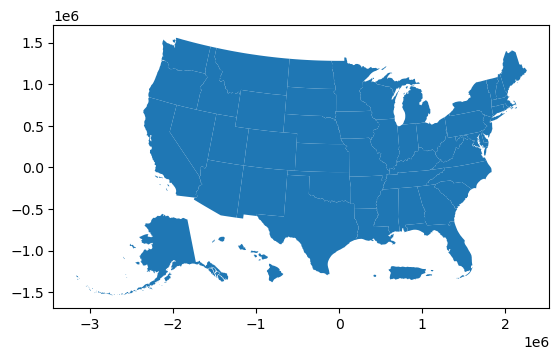

In [393]:
#| echo: false
#| code-fold: true
#| include: false
us = states(cb = True, resolution = "20m", year=2023)
us_rescaled = shift_geometry(us)
us_rescaled.plot()

In [394]:
#| echo: false
#| code-fold: true
#| include: false
# Join the data to geography
us_rescaled.head()

STATEFP   STATENS      GEOIDFQ GEOID STUSPS        NAME LSAD         ALAND  \
0      48  01779801  0400000US48    48     TX       Texas   00  676686238592   
1      06  01779778  0400000US06    06     CA  California   00  403673296401   
2      21  01779786  0400000US21    21     KY    Kentucky   00  102266598312   
3      13  01705317  0400000US13    13     GA     Georgia   00  149485311347   
4      55  01779806  0400000US55    55     WI   Wisconsin   00  140292627460   

        AWATER                                           geometry  
0  18982083586  POLYGON ((-998043.807 -568739.971, -997956.109...  
1  20291770234  MULTIPOLYGON (((-2066284.899 -204542.622, -205...  
2   2384223544  POLYGON ((571924.530 -84268.109, 577745.348 -8...  
3   4419673221  POLYGON ((939223.082 -230281.864, 951008.202 -...  
4  29343084365  MULTIPOLYGON (((708320.068 919586.190, 715683....

In [395]:
#| echo: false
#| code-fold: true
#| include: false
us_rescaled_final = us_rescaled.merge(
    df3,
    left_on=["GEOID"],
    right_on=["state"],
).drop(
    columns=["state"]
)

# Convert CRS
us_rescaled_final = us_rescaled_final.to_crs("EPSG:4326")

In [396]:
#| echo: false
#| code-fold: true
#| include: false
us_rescaled_final.columns

Index(['STATEFP', 'STATENS', 'GEOIDFQ', 'GEOID', 'STUSPS', 'NAME_x', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'NAME_y', 'GEO_ID', 'MedHHInc',
       'EducTotal', 'EducBelowHighSch', 'EducHighSch', 'EducAssoc', 'EducBach',
       'TotalPop', 'TotalPop16', 'LabForTotal', 'Unemployed',
       'PopPovertyDetermined', 'PovertyPop', 'PctBach', 'PovertyRate',
       'UnemploymentRate', 'LabForParticipationRate', 'YEAR', 'netexport',
       'REALGDP', 'Labour_Productivity', 'REALGDPpercapita'],
      dtype='object')

In [397]:
#| echo: false
#| code-fold: true
#| include: false

import matplotlib.pyplot as plt
import seaborn as sns

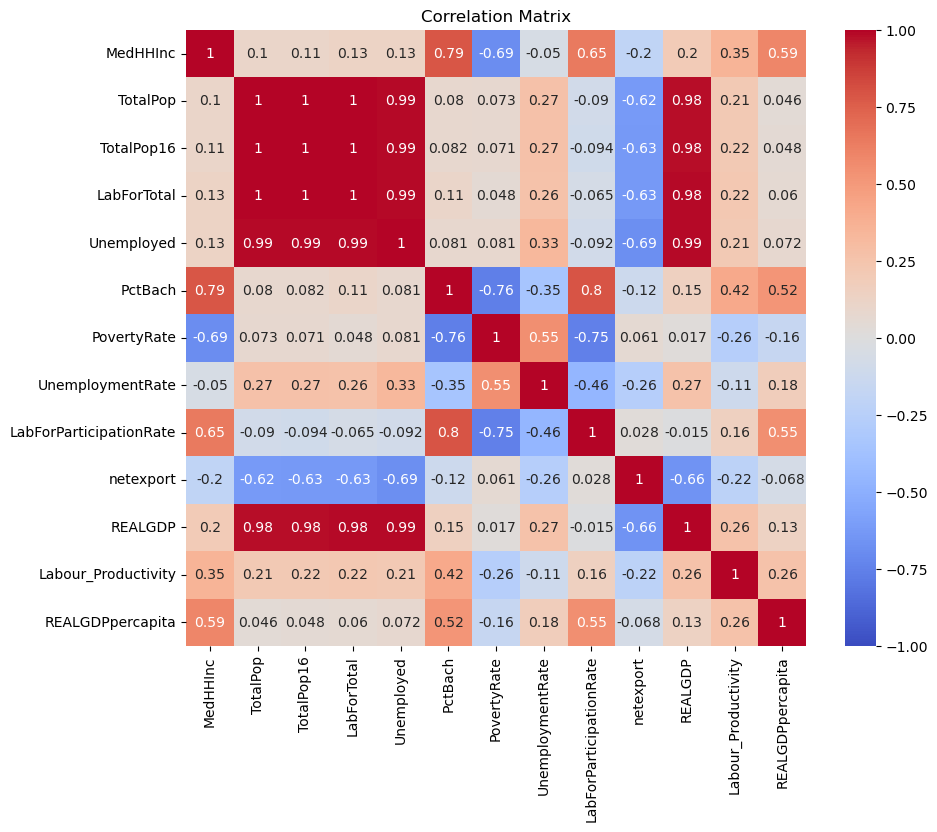

In [398]:
#| echo: false
#| code-fold: true
#| include: false

# Create a list of all variables
variables = ['MedHHInc','TotalPop', 'TotalPop16', 'LabForTotal', 'Unemployed','PctBach', 'PovertyRate', 'UnemploymentRate', 'LabForParticipationRate', 'netexport', 'REALGDP', 'Labour_Productivity', 'REALGDPpercapita']

# Create a list of selected variables for later analysis
selected_variables = ['REALGDPpercapita','MedHHInc','PctBach','UnemploymentRate','LabForParticipationRate', 'Labour_Productivity', 'TotalPop', 'PovertyRate', 'netexport']

# Calculate the correlation matrix
corr_matrix = us_rescaled_final[variables].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [399]:
#| output: false

!pip install geopandas hvplot panel


In [400]:
import geopandas as gpd
import altair as alt

In [402]:
import pandas as pd
import altair as alt

In [403]:
# Create the Altair plot for PctBach
alt.Chart(us_rescaled_final).mark_line().encode(
    x=alt.X('YEAR:Q', scale=alt.Scale(domain=[2019, 2023]), axis=alt.Axis(values=[2019, 2020, 2021, 2022, 2023], tickCount=5)),
    y='PctBach:Q',
    color='NAME_x:N',
    tooltip=['YEAR', 'PctBach', 'NAME_x']
).properties(
    title='PctBach against Year',
    width=800,
    height=600
)


alt.Chart(...)

In [404]:
# Create the Altair plot for REALGDPpercapita
alt.Chart(us_rescaled_final).mark_line().encode(
    x=alt.X('YEAR:Q', scale=alt.Scale(domain=[2019, 2023]), axis=alt.Axis(values=[2019, 2020, 2021, 2022, 2023], tickCount=5)),
    y='REALGDPpercapita:Q',
    color='NAME_x:N',
    tooltip=['YEAR', 'REALGDPpercapita', 'NAME_x']
).properties(
    title='REALGDPpercapita against Year',
    width=800,
    height=600
)

alt.Chart(...)

In [405]:
# Create the Altair plot for MedHHInc
alt.Chart(us_rescaled_final).mark_line().encode(
    x=alt.X('YEAR:Q', scale=alt.Scale(domain=[2019, 2023]), axis=alt.Axis(values=[2019, 2020, 2021, 2022, 2023], tickCount=5)),
    y='MedHHInc:Q',
    color='NAME_x:N',
    tooltip=['YEAR', 'MedHHInc', 'NAME_x']
).properties(
    title='MedHHInc against Year',
    width=800,
    height=600
)

alt.Chart(...)

The three dependent varaibles real GDP per capita (REALGDPpercapita), median household income (MedHHInc), and percentage of bachelor's degree graduate (PctBach) appear to be increasing over time from 2019 to 2023.

Percentage of bachelor's degree graduate appears to be increasing between 2019 to 2023 for all states. There are clear disparities between states as to the percentage of bachelor's degree graduate, which is supported by the map plot in our exploratory analysis.

Real GDP per capita appears to be relatively constant between 2019 to 2023 for most states. This could be due to the economic impact of the Covid-19 pandemic that resulted in fewer economic activities.

Finally, the gradient of the median household income line looks relatively similar across states, suggesting that all states are experiencing relative growth in median household income.